# Ensembles

###  Consider 'house_data.csv' dataset which includes homes sold between 06.2014 and 05.2015. Your task is to use AdaBoost  and Random Forest algorithms to predict the sales price of houses. "Price" is the label

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import sklearn
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from time import time
from sklearn import preprocessing
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Task 1: Preprocessing

### 1. Load the data and display. Below the code cell write the adaboost algorithm (Just the 4 steps, no need explanation)

In [2]:
dataset=pd.read_csv("house_data.csv")
display(dataset)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**Steps in AdaBoost algorithm** <br>

1) Initialize sample weights uniformly as $w_n^(1) = \frac{1}{N}$, for n=1,...N.<br>

2) For each iteration m=1,...M<br>

a) Train a new weak classifier $h_m(x)$ using the current coefficients $W^{(m)}$ by minimizing the weigth error function $J_m = \sum_{n=1}^N w_n^{(m)}I(h_m(x)\neq t_n$.<br>

b) Estimate the weight error of this classifier $\epsilon _m = \frac{\sum_{n=1}^N w_n^{(m)}I(h_m(x)\neq t_n}{\sum_{n-=1}^N w_n^{(m)}}$ <br>

c) Calculating a weighting coefficient for $h_m(x):am=?$ <br> 

d) Updating the weighting coefficients: $w_n^{m+1)} = ?$<br>

3) Make final prediction as weighted majority vote of weak learner predictions: $H(x) = \text{sign} \Big( \sum_{n=1}^N \alpha_m h_m(x) \Big)$. <br>



### 2. Print or visualise the following
- What is the size of the data.
- What is the datatype of each feature/column.
- Null or missing values.  
- What are unique values of categorical variables

#### 2a) Size of the data

In [3]:
print("Size of data: ",dataset.shape)
print("Length of data:",len(dataset))

Size of data:  (21613, 21)
Length of data: 21613


#### 2b) Datatype of each feature/column

In [4]:
print("Datatype of each feature or column:\n",dataset.dtypes)

Datatype of each feature or column:
 id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


#### 2c) Null or missing values

In [5]:
print('Null or missing values in columns:',dataset.isnull().any().sum())
print('Null or missing values in data:',dataset.isnull().any(axis=1).sum())

Null or missing values in columns: 0
Null or missing values in data: 0


#### 2d) Unique values of categorical variables

In [6]:
print("Unique values of categorical variables:")
for column in dataset:
    print(column,":",dataset[column].unique())

Unique values of categorical variables:
id : [7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
date : ['20141013T000000' '20141209T000000' '20150225T000000' '20150218T000000'
 '20140512T000000' '20140627T000000' '20150115T000000' '20150415T000000'
 '20150312T000000' '20150403T000000' '20140527T000000' '20140528T000000'
 '20141007T000000' '20150124T000000' '20140731T000000' '20140529T000000'
 '20141205T000000' '20150424T000000' '20140514T000000' '20140826T000000'
 '20140703T000000' '20140516T000000' '20141120T000000' '20141103T000000'
 '20140626T000000' '20141201T000000' '20140624T000000' '20150302T000000'
 '20141110T000000' '20141203T000000' '20140613T000000' '20141230T000000'
 '20150213T000000' '20140620T000000' '20140715T000000' '20140811T000000'
 '20140707T000000' '20141028T000000' '20140729T000000' '20140718T000000'
 '20150325T000000' '20140716T000000' '20150428T000000' '20150311T000000'
 '20140916T000000' '20150217T000000' '20141231T000000' '20150205T000000'


### 3. Correlation
- Check the correlation between the features and target values (house' prices) (Provide a bar chart). 
- Maybe remove features which do not have much impact on the price (Mention if any). 
- Visualise the first three highest correlated features across the (house' prices).

Here, the target variable is prices and all other variable than prices are input variables.

Correlation between features and target variables:
 price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


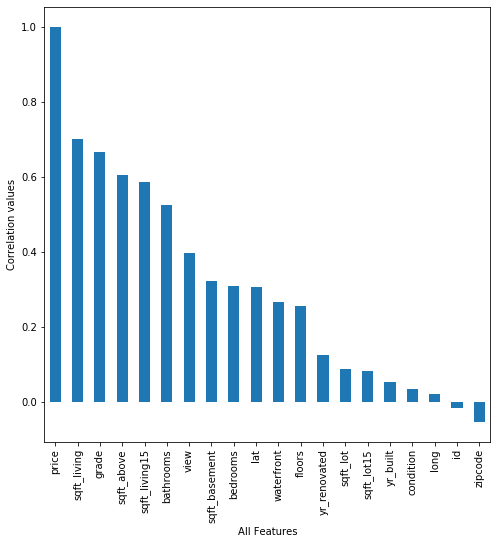

In [7]:
corr=dataset[dataset.columns[0:]].corr()['price'][:].sort_values(ascending=False)
print("Correlation between features and target variables:\n",corr)

#Bar Plot
plt.figure(figsize=(8,8))
plt.xlabel("All Features")
plt.ylabel("Correlation values")
corr.plot.bar()

The features **id, zipcode** have negative correlation. Thus they do not make much impact on the price. Those features will not used for the model. 

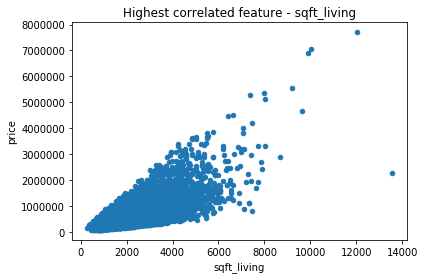

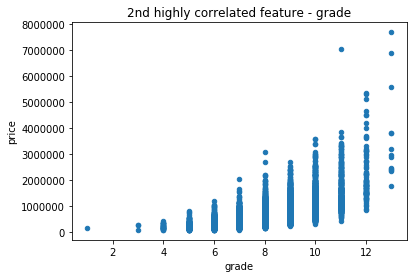

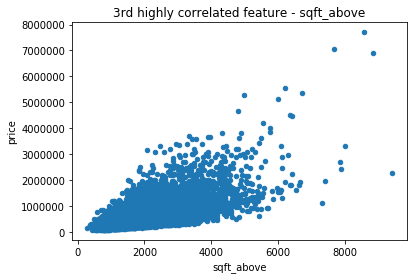

In [8]:
#Highest correlated feature
var1 = 'sqft_living'
data1 = pd.concat([dataset['price'], dataset[var1]], axis=1)
data1.plot.scatter(x=var1, y='price',title='Highest correlated feature - sqft_living')

#2nd highest corelated feature
var2 = 'grade'
data2 = pd.concat([dataset['price'],dataset[var2]], axis=1)
data2.plot.scatter(x=var2,y='price',title='2nd highly correlated feature - grade')

#3rd highest correlated feature
var3 = 'sqft_above'
data3 = pd.concat([dataset['price'],dataset[var3]], axis=1)
data3.plot.scatter(x=var3,y='price',title='3rd highly correlated feature - sqft_above')

##Ensemble methods
###  Apply the methods using sklearn library  

- Split the data into training and testing sets (75-25%) 
- Train and test the model for 
    - AdaBoost
    - Random Forest

In [9]:
#Independant variable
x = dataset[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront', 'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']].values
#Dependant variable
Y = dataset['price'].values
Y = Y.reshape(-1,1)

X = preprocessing.StandardScaler().fit(x).transform(x)
y = preprocessing.StandardScaler().fit(Y).transform(Y)

#Splitting data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

**Adaboost regression**

In [10]:
#No of trees is 50
adaboost_regressor_50 = AdaBoostRegressor(n_estimators=50, learning_rate=0.2)
#No of trees is 100
adaboost_regressor_100 = AdaBoostRegressor(n_estimators=100, learning_rate=0.2)

#n_estimators=50
start_ada_tr_50 = time()
adaboost_model_50 = adaboost_regressor_50.fit(X_train,y_train)
end_ada_tr_50 = time()
train_time_ada_50 = end_ada_tr_50 - start_ada_tr_50
start_ada_te_50 = time()
pred_adaboost_50 = adaboost_model_50.predict(X_test)
end_ada_te_50 = time()
test_time_ada_50 = end_ada_te_50 - start_ada_te_50

#n_estimators=100
start_ada_tr_100 = time()
adaboost_model_100 = adaboost_regressor_100.fit(X_train,y_train)
end_ada_tr_100 = time()
train_time_ada_100 = end_ada_tr_100 - start_ada_tr_100
start_ada_te_100 = time()
pred_adaboost_100 = adaboost_model_100.predict(X_test)
end_ada_te_100 = time()
test_time_ada_100 = end_ada_te_100 - start_ada_te_100

**Randomforest regression**

In [11]:
#No of trees is 50
random_forest_regressor_50 = RandomForestRegressor(n_estimators=50, max_depth=6)
#No of trees is 100
random_forest_regressor_100 = RandomForestRegressor(n_estimators=100, max_depth=5)

start_random_tr_50 = time()
rand_model_50 = random_forest_regressor_50.fit(X_train,y_train)
end_random_tr_50 = time()
train_time_random_50= end_random_tr_50 - start_random_tr_50
start_random_te_50 = time()
pred_random_forest_50 = rand_model_50.predict(X_test)
end_random_te_50 = time()
test_time_random_50 = end_random_te_50 - start_random_te_50


start_random_tr_100 = time()
rand_model_100 = random_forest_regressor_100.fit(X_train,y_train)
end_random_tr_100 = time()
train_time_random_100= end_random_tr_100 - start_random_tr_100
start_random_te_100 = time()
pred_random_forest_100 = rand_model_100.predict(X_test)
end_random_te_100 = time()
test_time_random_100 = end_random_te_100 - start_random_te_100

## Task 4
Evaluate results<br>
- Print the following for both adaboost and random forest
    - Variance score (test)
    - R2 score (test)
    - Time taken (train)(test)
    - max error (test)
    - mean absolute error (test)
  
- Which performed well adaboost or random forest? why?

In [12]:
#Evaluating the models with validation accuracy and report
def evaluate(y_test,pred):
    print("Variance score:",metrics.explained_variance_score(y_test,pred))
    print("R2 score: ",metrics.r2_score(y_test,pred))
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, pred))
    print("Max Error:",metrics.max_error(y_test,pred))

#For Adaboost
print("\nResults for Adaboost - n_estimators = 50")
evaluate(y_test,pred_adaboost_50)
print("Time taken for train Adaboost",train_time_ada_50)
print("Time taken for test Adaboost",test_time_ada_50,"\n")

print("\nResults for Adaboost - n_estimators = 100")
evaluate(y_test,pred_adaboost_100)
print("Time taken for train Adaboost",train_time_ada_100)
print("Time taken for test Adaboost",test_time_ada_100,"\n")


Results for Adaboost - n_estimators = 50
Variance score: 0.7093568502258725
R2 score:  0.6764758455535949
Mean Absolute Error: 0.4218045218037115
Max Error: 7.120892130288022
Time taken for train Adaboost 2.606235980987549
Time taken for test Adaboost 0.03885006904602051 


Results for Adaboost - n_estimators = 100
Variance score: 0.7006740122601738
R2 score:  0.5892199779157521
Mean Absolute Error: 0.519710361922236
Max Error: 8.210201657091288
Time taken for train Adaboost 4.198477029800415
Time taken for test Adaboost 0.11613917350769043 



In [13]:
# For Random Forest
print("\nResults for Randomforest - n_estimators = 50")
evaluate(y_test,pred_random_forest_50)
print("Time taken for train Randomforest",train_time_random_50)
print("Time taken for test Randomforest",test_time_random_50)

print("\nResults for Randomforest - n_estimators = 100")
evaluate(y_test,pred_random_forest_100)
print("Time taken for train Randomforest",train_time_random_100)
print("Time taken for test Randomforest",test_time_random_100)


Results for Randomforest - n_estimators = 50
Variance score: 0.8124669302636607
R2 score:  0.8124185627088971
Mean Absolute Error: 0.2625214422564723
Max Error: 6.414899549857751
Time taken for train Randomforest 3.6174309253692627
Time taken for test Randomforest 0.04259085655212402

Results for Randomforest - n_estimators = 100
Variance score: 0.7787300528550766
R2 score:  0.7787104801593356
Mean Absolute Error: 0.28595786432410697
Max Error: 7.070014828077502
Time taken for train Randomforest 6.649608850479126
Time taken for test Randomforest 0.05333399772644043


From the above results, it can be seen that the random forest performs better than Adaboost as the mean absolute error is lesser for random forest compared to Adaboost. But random forest takes more time as it is a decision tree whereas Adaboost takes less time as it is a boosting algorithm.

## Task 5
Plot complexity curve
- Plot the complexity curve for Variance score for 50 tree number 
    - Adaboost for test and train
    - Random forest for test and train

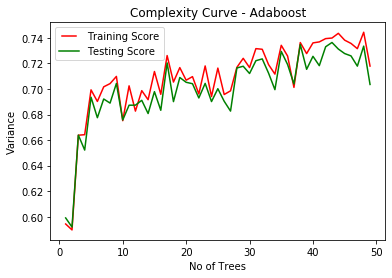

In [14]:
train_results, test_results = [], []
list_nb_trees = list(range(1,50))

for nb_trees in list_nb_trees:
    ada = AdaBoostRegressor(n_estimators=nb_trees)
    ada.fit(X_train, y_train)

    train_results.append(metrics.explained_variance_score(y_train, ada.predict(X_train)))
    test_results.append(metrics.explained_variance_score(y_test, ada.predict(X_test)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.title("Complexity Curve - Adaboost")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Variance')
plt.xlabel('No of Trees')
plt.show()

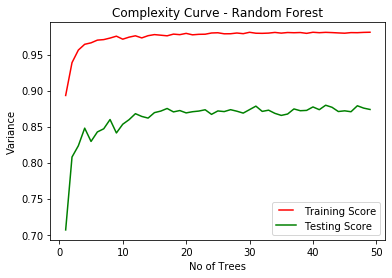

In [15]:
train_results, test_results = [], []
list_nb_trees = list(range(1,50))

for nb_trees in list_nb_trees:
    rf = RandomForestRegressor(n_estimators=nb_trees)
    rf.fit(X_train, y_train)

    train_results.append(metrics.explained_variance_score(y_train, rf.predict(X_train)))
    test_results.append(metrics.explained_variance_score(y_test, rf.predict(X_test)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.title("Complexity Curve - Random Forest")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Variance')
plt.xlabel('No of Trees')
plt.show()